# CS224n: NLP with Deep Learning

# Lecture 4: Backpropagation and Computational Graphs

---

## Matrix Gradients

We can analyse the weights individually, before going back to the matrix form:
$W_{ij}$:
* $i$ refers to the position of the hidden layer output
* $j$ refres to the position of the input layer

Thus, $W_{ij}$ only contributes to $z_{i}$, and not to the other $z_{k}$

### Tips

**Tip 1**

* Carefully define variables at each new step
* Keep track of their dimensions all the time

**Tip 2**

Chain rule

**Tip 3**

Derivng softmax:  
* separate the cases according to whether we are calculating the softmax of the correct class or not

**Tip 4**
* Start by doing element-wise derivation, before going global witht the matrix derivation

**Tip 5**

Use the Shape Convention  
* Error message $\delta$ at ahidden layer has the same dimensionality as that hidden layer

### Words

During training, gradient descent pushes words around

* Always use available "pre-trained" word vectors

Should I update my own word vectors?
* If we have a small training set:  
No
* If our training set is large:  
Yes

---

## Computational Graphs & Backprop

### Forward Propagation

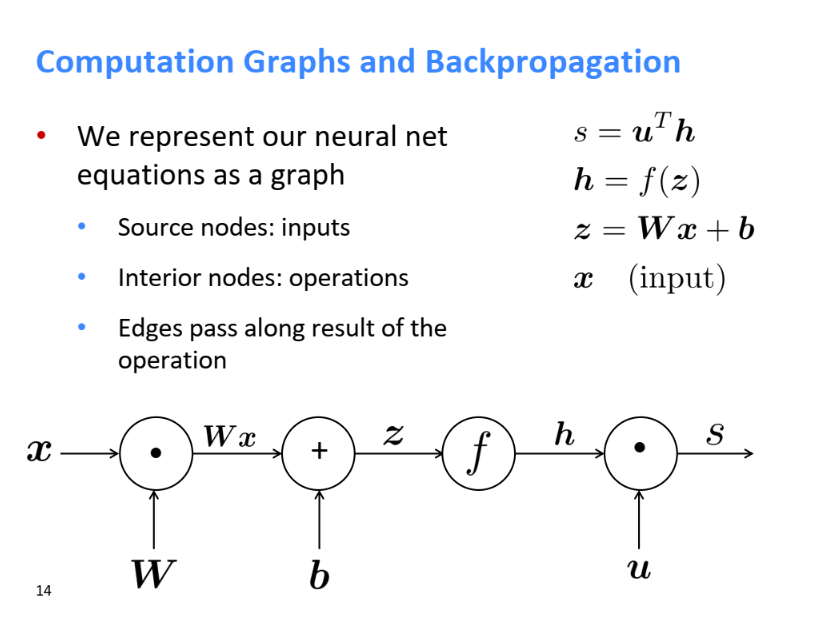

### Back Propagation

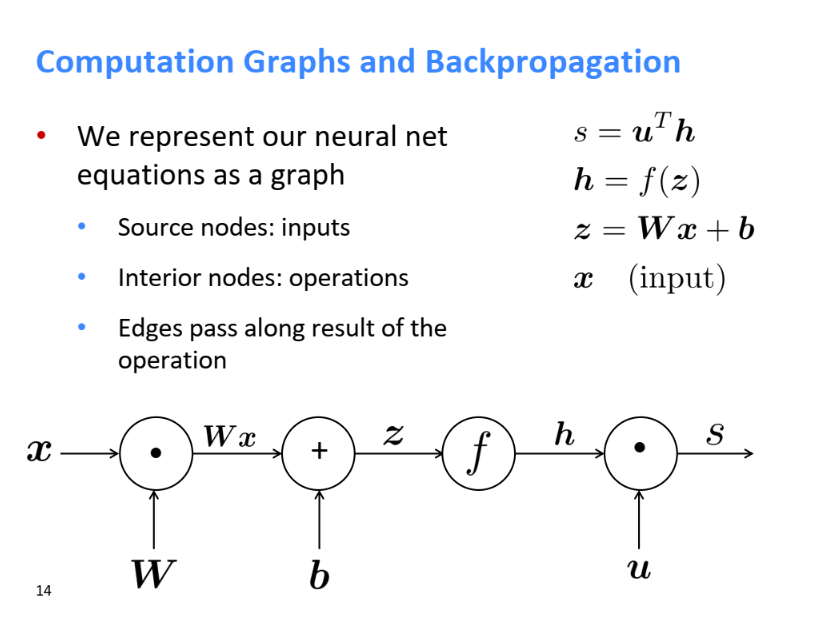

Using the chain rule, we know that:

[downstream gradient] = [upstream gradient] x [local gradient]

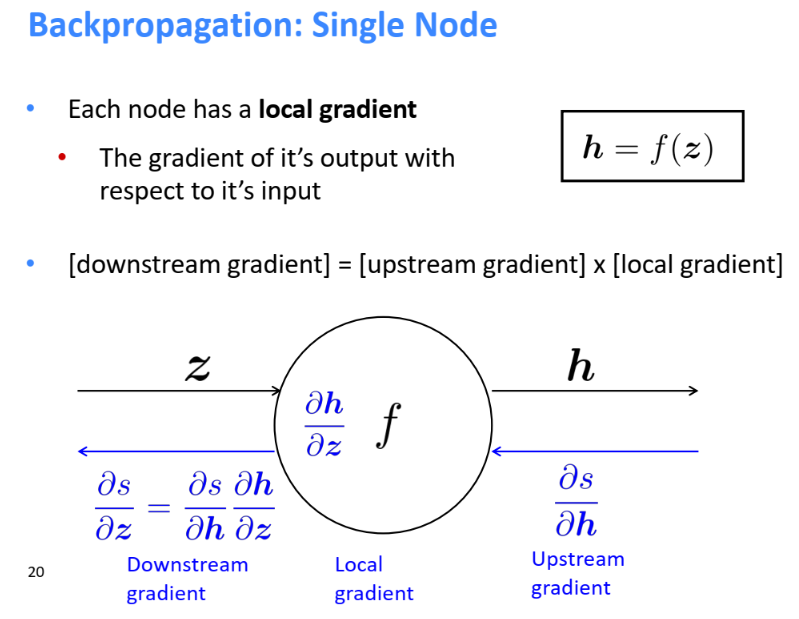

### An easy example

#### Forward

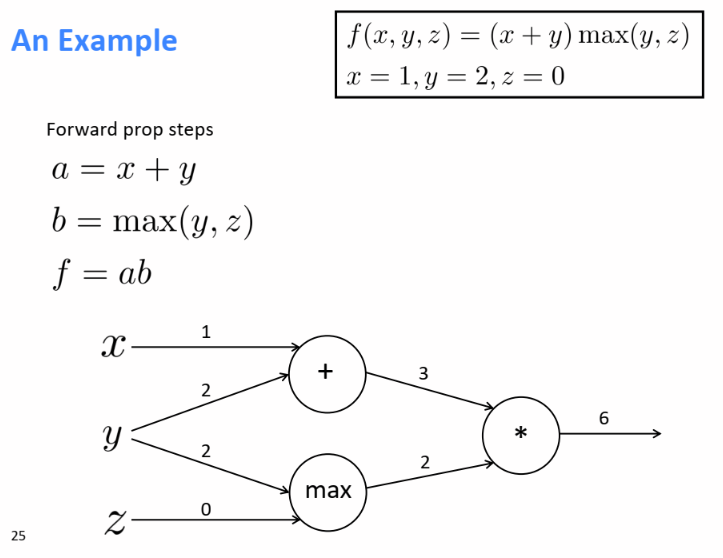

#### Backward

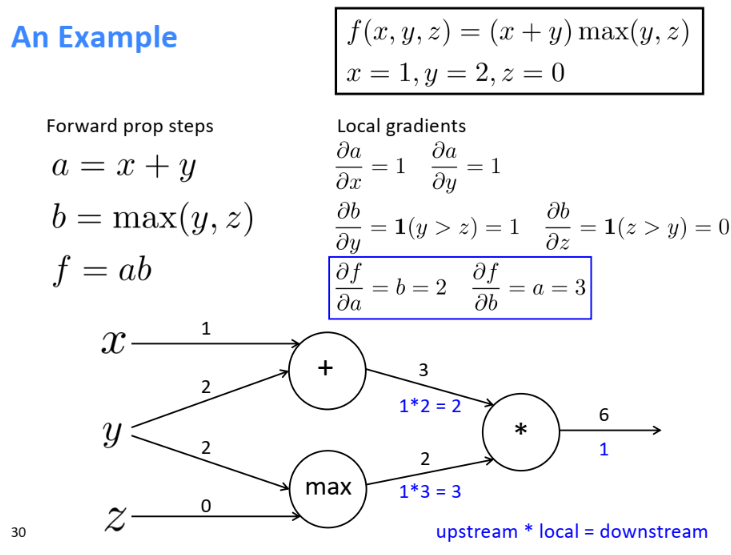

Don't forget to sum the 2 gradients for $y$ !

Indeed, if we change $y$ a little bit, it is going to impact our result $f$ in 2 ways, one coming through the $a$ path, the other one through the $b$ path

Hence, the need to account for both these paths by summing the impacts of $y$ on them

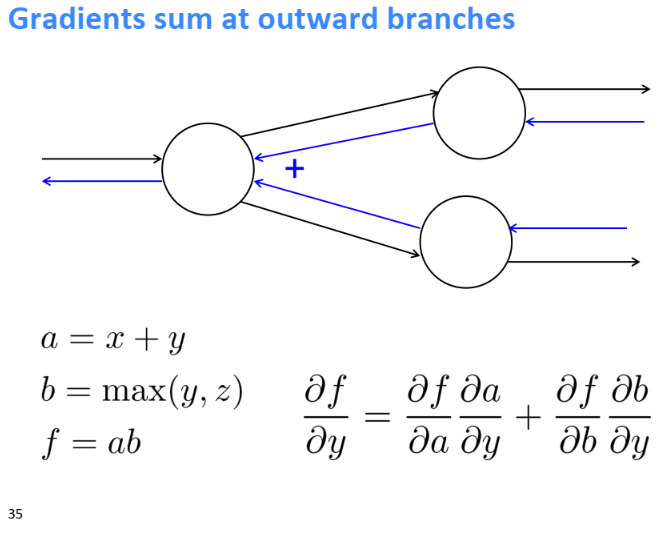

What can we learn from this example?

### Node intuitions

* $+$ distributes the upstream gradient among all the inputs
* $max$ routes the upstream gradient to a single input:  
It sends the gradient to the direction of the max inputn while other inputs don't get any
* $\ast$ switches the upstream gradient

### Computing gradients efficiently

* Compute them all at once
* by starting from the output, even if we only need one!

So that we don't compute the same gradients again

### General Method

1. Forward prop in topological order  
(ie calculate the ones that depend on others after these are finished)

2. Back prop  
* Initialize output gradient to 1
* Visit nodes in reverse order
* Compute their gradients using their node successors (ie coming from the ouput)

$$ 
\boxed{
\frac{\partial f} {\partial x}
= 
 \sum_{i=1}^{n} \frac{\partial f} {\partial y_{i}} \cdot \frac{\partial y_{i}} {\partial x}
}
$$

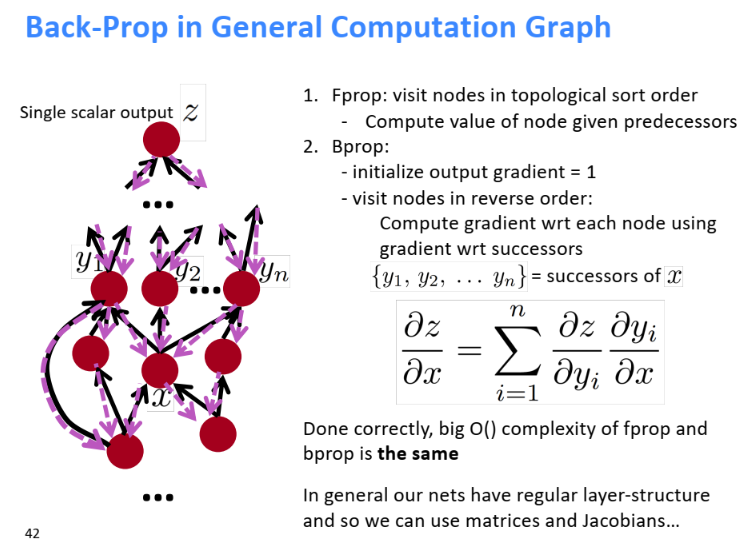

Big O() complexity of forward prop, and of backprop !

It is **not** a super complex calculation to run

### Implementation Structure

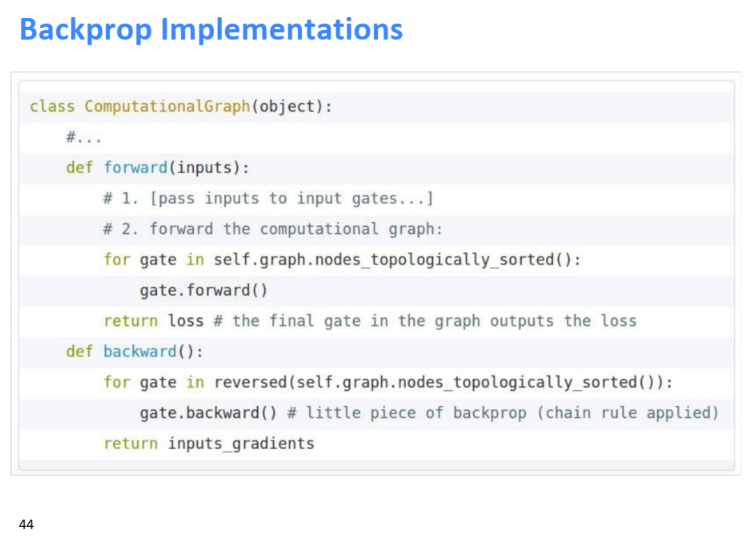

* Don't forget to store the values at each node, even during the forward prop!

Here is an example of why it is useful to do so:

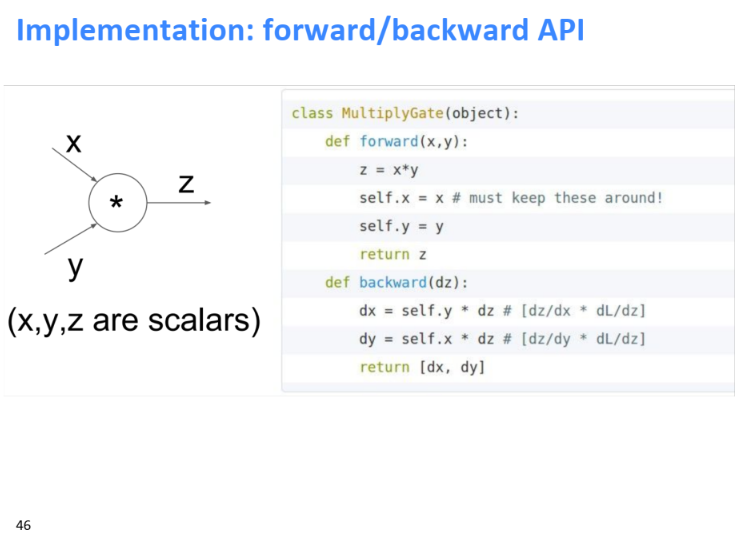

When we use a Deep Learning framework, somebody has already done this work for us !!

Forward and backward prop have already been implemented!

It is just experimenting, playing with Legos, without needing to understand the underlying math  
(doesn't mean we shouldn't!)

* But we have to do this if we want to do research, and to create our own algorithms

### Gradient checking: Numerical Gradient

* We estimate the slope $f'(x)$ by wiggling $x$ a bit in both directions:  
  we just use $f(x-h)$ and $f(x+h)$

* Easy to implement, thus useful for an easy check

* However, very slow: we have to evaluate our functions on millions of parameter combinations  
==> Thus, not used in practice for computation

* Hence, just implement it using a *if* statement  to (de)activate it for debugging

* Much less needed now, when we can just throw layers easily using well-written frameworks

---

## Stuff to know

### Regularization

* Add a L2 regularization so that our parameters don't get too big  
=> Prevent overfitting  
    * As our weights are quite small, the values that are inputted to our activation functions (such as tanh, sigmoid...) will not be saturated  
    * They will instead be in the linear part of the activation function, and hence the neural network will output a combination of linear models, ie a linear model
    * Hence, the overfitting prevention: staying close to a linear (thus simple) decision boundary

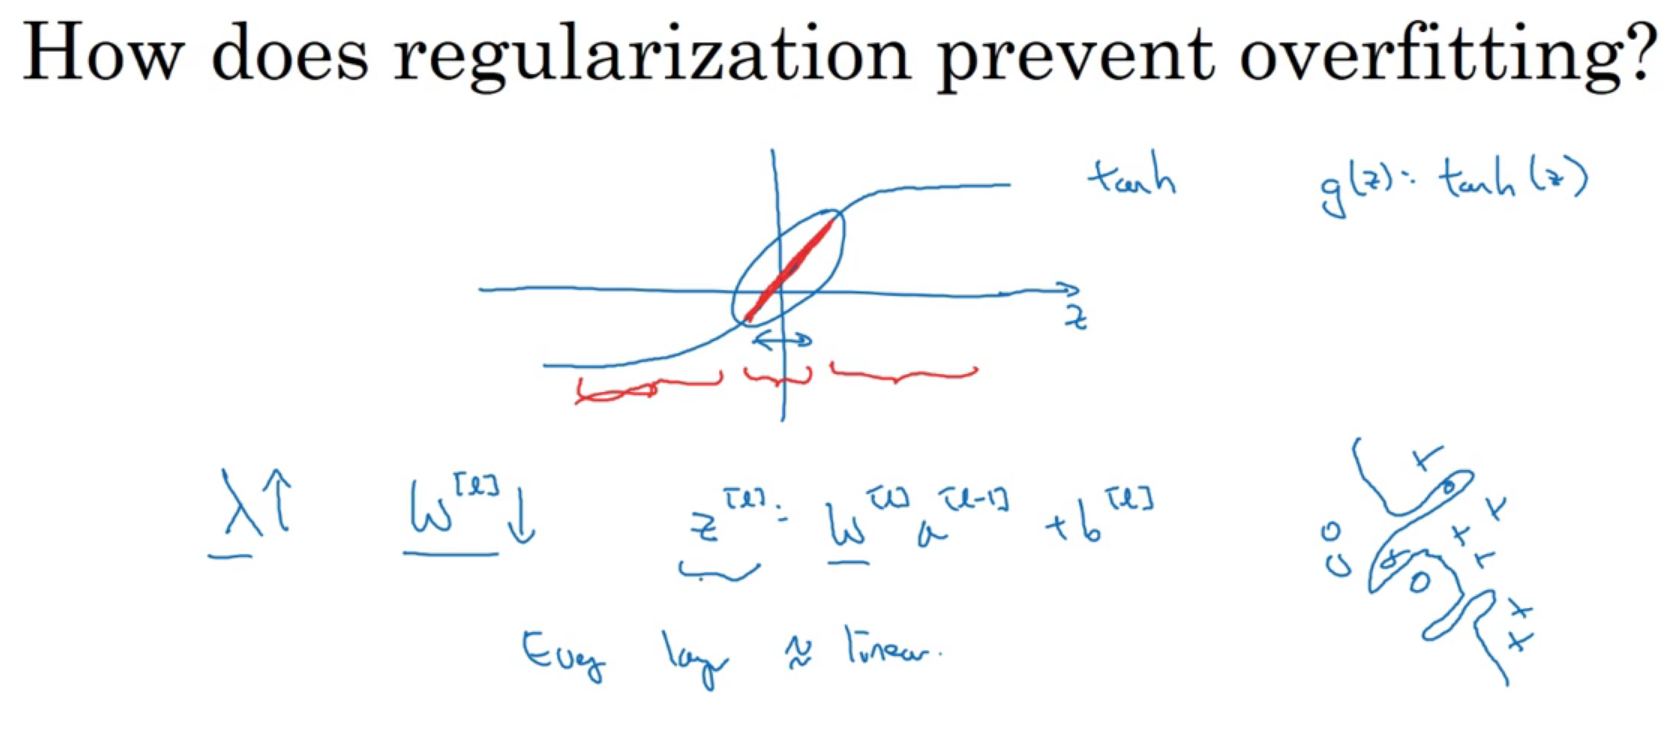

* Regularization is even more important in Deep Learning than in Classical Machine Learning, because Deep Learning has much more parameters

* On the other hand, L1-regularization will compress several weights to 0, and thus operate a feature selection

### Vectorization

* Vectors and other higher-dimensional objects:
    * 1D: Vectors
    * 2D: Matrices
    * 3D: Tensors

* Always use vector and matrix implementations to compute much faster  
(as opposed to *for*-loops)

### Non-linearities

* Sigmoid (logistic function)

    * Used a lot in the beginnings of Neural Nets  
    Not much used now!

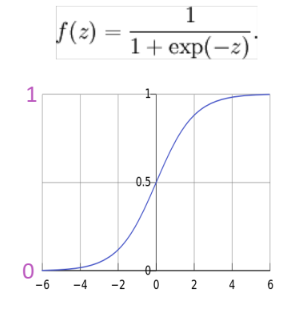

* tanh

    * tanh is just a rescaled and shifted sigmoid!
    
    $$ tanh(z) = 2 \  logistic(2z) - 1$$
    
    * It is now symmetrical between [-1,1], which helps a lot for Neural Nets
    * However, its derivatives are quite expensive to compute!

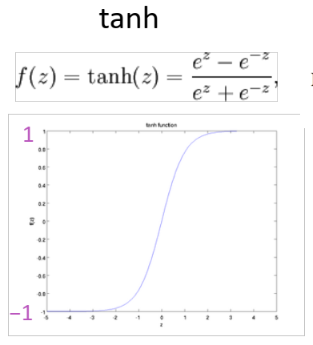

* Hard tanh

    * The involved math is easier than with tanh  
    Thus faster to compute!
    
    * The gradient becomes 0 when it gets at either end of the function, so things go "dead"  
    Thus, try to stay in the middle part long enough!
   
   * If even such a simple function works, why not go even more simple? 😄

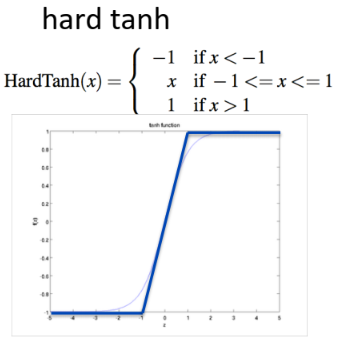

* ReLU

    * Trains fast
    * Performs well !
    
**What everyone uses Now !**

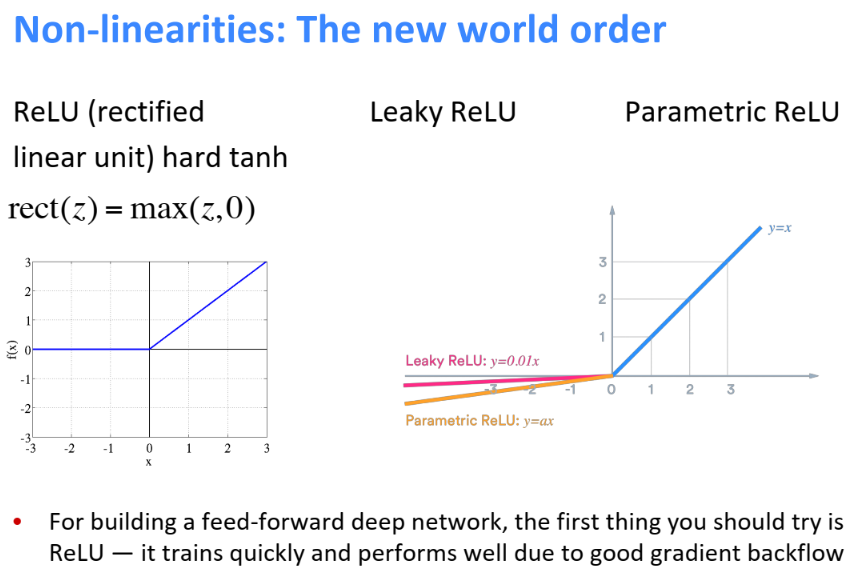

### Parameter Initialization

* Initialize weights with small random values to break symmetry
    * Small so that we stay in the middle zones of the activation functions

* Use Xavier initialzation

### Optimizers

* Usually, plain SGD works fine

* For more complex neural nets, we can use more sophisticated "adaptive' optimizers:
    * Adagrad
    * RMSprop
    * **Adam**: a safe starter choice !
    * ...

### Learning Rates

* First, try different powers of 10 to get the right order of magnitude

* Better results by decreasing the learning rate as we train

    * By hand: halve learning rate very *k* epochs
    * Using a formula, for example an exponential decaying learning rate

* Use a higher learning rate with fancier optimizers, as it will shrink rapidly